# Data Wrangling Project - DAND

## by Hari Sankaran Nair

In [94]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import json
import time
import math
import re
import tweepy
import requests
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering

In [95]:
# Read the provided file with Twitter archive into a new DataFrame
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [96]:
# Programmatically download the tweet image predictions TSV file using  Requests library
# Then write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
# Read the image predictions  into a DataFrame
image_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [6]:
# Create variables for the personal Twitter API keys and access tokens
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

In [7]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [8]:
api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [10]:
# Using the tweet IDs in the Twitter archive, query the Twitter API for each tweet's JSON

start_time = time.time() # start timer

with open('error_status.txt', 'w') as errorfile: 
    valid_ids = 0
    error_ids = 0
    tweet_ids = archive_df.tweet_id
    with open('tweet_json.txt', 'w', encoding='utf-8') as outfile:
        for i, tweet_id in tweet_ids.iteritems():
            try:
                print("%s# %s" % (str(i+1), tweet_id))
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                json_content = tweet._json
                json.dump(json_content, outfile)
                outfile.write('\n')
                valid_ids += 1
            except tweepy.TweepError as error:
                error_ids += 1
                error_str = []
                error_str.append(str(tweet_id))
                error_str.append(': ')
                error_str.append(error.response.json()['errors'][0]['message'])
                error_str.append('\n')
                errorfile.write(''.join(error_str))
                print(''.join(error_str))
                continue
        print("%s %s" % ('Valid tweets:', valid_ids))
        print("%s %s" % ('Error tweets:', error_ids))
        
end_time = time.time() # end timer
print((end_time - start_time)/(1000*60))

1# 892420643555336193
2# 892177421306343426
3# 891815181378084864
4# 891689557279858688
5# 891327558926688256
6# 891087950875897856
7# 890971913173991426
8# 890729181411237888
9# 890609185150312448
10# 890240255349198849
11# 890006608113172480
12# 889880896479866881
13# 889665388333682689
14# 889638837579907072
15# 889531135344209921
16# 889278841981685760
17# 888917238123831296
18# 888804989199671297
19# 888554962724278272
20# 888202515573088257
888202515573088257: No status found with that ID.

21# 888078434458587136
22# 887705289381826560
23# 887517139158093824
24# 887473957103951883
25# 887343217045368832
26# 887101392804085760
27# 886983233522544640
28# 886736880519319552
29# 886680336477933568
30# 886366144734445568
31# 886267009285017600
32# 886258384151887873
33# 886054160059072513
34# 885984800019947520
35# 885528943205470208
36# 885518971528720385
37# 885311592912609280
38# 885167619883638784
39# 884925521741709313
40# 884876753390489601
41# 884562892145688576
42# 88444180538

318# 834786237630337024
319# 834574053763584002
320# 834477809192075265
321# 834458053273591808
322# 834209720923721728
323# 834167344700198914
324# 834089966724603904
325# 834086379323871233
326# 833863086058651648
327# 833826103416520705
328# 833732339549220864
329# 833722901757046785
330# 833479644947025920
331# 833124694597443584
332# 832998151111966721
333# 832769181346996225
334# 832757312314028032
335# 832682457690300417
336# 832645525019123713
337# 832636094638288896
338# 832397543355072512
339# 832369877331693569
340# 832273440279240704
341# 832215909146226688
342# 832215726631055365
343# 832088576586297345
344# 832040443403784192
345# 832032802820481025
346# 831939777352105988
347# 831926988323639298
348# 831911600680497154
349# 831670449226514432
350# 831650051525054464
351# 831552930092285952
352# 831322785565769729
353# 831315979191906304
354# 831309418084069378
355# 831262627380748289
356# 830956169170665475
357# 830583320585068544
358# 830173239259324417
359# 83009740037

651# 792883833364439040
652# 792773781206999040
653# 792394556390137856
654# 792050063153438720
655# 791821351946420224
656# 791784077045166082
657# 791780927877898241
658# 791774931465953280
659# 791672322847637504
660# 791406955684368384
661# 791312159183634433
662# 791026214425268224
663# 790987426131050500
664# 790946055508652032
665# 790723298204217344
666# 790698755171364864
667# 790581949425475584
668# 790337589677002753
669# 790277117346975746
670# 790227638568808452
671# 789986466051088384
672# 789960241177853952
673# 789903600034189313
674# 789628658055020548
675# 789599242079838210
676# 789530877013393408
677# 789314372632018944
678# 789280767834746880
679# 789268448748703744
680# 789137962068021249
681# 788908386943430656
682# 788765914992902144
683# 788552643979468800
684# 788412144018661376
685# 788178268662984705
686# 788150585577050112
687# 788070120937619456
688# 788039637453406209
689# 787810552592695296
690# 787717603741622272
691# 787397959788929025
692# 78732244394

Rate limit reached. Sleeping for: 529


882# 760521673607086080
883# 760290219849637889
884# 760252756032651264
885# 760190180481531904
886# 760153949710192640
887# 759943073749200896
888# 759923798737051648
889# 759846353224826880
890# 759793422261743616
891# 759566828574212096
759566828574212096: No status found with that ID.

892# 759557299618865152
893# 759447681597108224
894# 759446261539934208
895# 759197388317847553
896# 759159934323924993
897# 759099523532779520
898# 759047813560868866
899# 758854675097526272
900# 758828659922702336
901# 758740312047005698
902# 758474966123810816
903# 758467244762497024
904# 758405701903519748
905# 758355060040593408
906# 758099635764359168
907# 758041019896193024
908# 757741869644341248
909# 757729163776290825
910# 757725642876129280
911# 757611664640446465
912# 757597904299253760
913# 757596066325864448
914# 757400162377592832
915# 757393109802180609
916# 757354760399941633
917# 756998049151549440
918# 756939218950160384
919# 756651752796094464
920# 756526248105566208
921# 75630328

1211# 715680795826982913
1212# 715360349751484417
1213# 715342466308784130
1214# 715220193576927233
1215# 715200624753819648
1216# 715009755312439296
1217# 714982300363173890
1218# 714962719905021952
1219# 714957620017307648
1220# 714631576617938945
1221# 714606013974974464
1222# 714485234495041536
1223# 714258258790387713
1224# 714251586676113411
1225# 714214115368108032
1226# 714141408463036416
1227# 713919462244790272
1228# 713909862279876608
1229# 713900603437621249
1230# 713761197720473600
1231# 713411074226274305
1232# 713177543487135744
1233# 713175907180089344
1234# 712809025985978368
1235# 712717840512598017
1236# 712668654853337088
1237# 712438159032893441
1238# 712309440758808576
1239# 712097430750289920
1240# 712092745624633345
1241# 712085617388212225
1242# 712065007010385924
1243# 711998809858043904
1244# 711968124745228288
1245# 711743778164514816
1246# 711732680602345472
1247# 711694788429553666
1248# 711652651650457602
1249# 711363825979756544
1250# 711306686208872448


1539# 689835978131935233
1540# 689661964914655233
1541# 689659372465688576
1542# 689623661272240129
1543# 689599056876867584
1544# 689557536375177216
1545# 689517482558820352
1546# 689289219123089408
1547# 689283819090870273
1548# 689280876073582592
1549# 689275259254616065
1550# 689255633275777024
1551# 689154315265683456
1552# 689143371370250240
1553# 688916208532455424
1554# 688908934925697024
1555# 688898160958271489
1556# 688894073864884227
1557# 688828561667567616
1558# 688804835492233216
1559# 688789766343622656
1560# 688547210804498433
1561# 688519176466644993
1562# 688385280030670848
1563# 688211956440801280
1564# 688179443353796608
1565# 688116655151435777
1566# 688064179421470721
1567# 687841446767013888
1568# 687826841265172480
1569# 687818504314159109
1570# 687807801670897665
1571# 687732144991551489
1572# 687704180304273409
1573# 687664829264453632
1574# 687494652870668288
1575# 687480748861947905
1576# 687476254459715584
1577# 687460506001633280
1578# 687399393394311168


Rate limit reached. Sleeping for: 606


1782# 677698403548192770
1783# 677687604918272002
1784# 677673981332312066
1785# 677662372920729601
1786# 677644091929329666
1787# 677573743309385728
1788# 677565715327688705
1789# 677557565589463040
1790# 677547928504967168
1791# 677530072887205888
1792# 677335745548390400
1793# 677334615166730240
1794# 677331501395156992
1795# 677328882937298944
1796# 677314812125323265
1797# 677301033169788928
1798# 677269281705472000
1799# 677228873407442944
1800# 677187300187611136
1801# 676975532580409345
1802# 676957860086095872
1803# 676949632774234114
1804# 676948236477857792
1805# 676946864479084545
1806# 676942428000112642
1807# 676936541936185344
1808# 676916996760600576
1809# 676897532954456065
1810# 676864501615042560
1811# 676821958043033607
1812# 676819651066732545
1813# 676811746707918848
1814# 676776431406465024
1815# 676617503762681856
1816# 676613908052996102
1817# 676606785097199616
1818# 676603393314578432
1819# 676593408224403456
1820# 676590572941893632
1821# 676588346097852417


2110# 670449342516494336
2111# 670444955656130560
2112# 670442337873600512
2113# 670435821946826752
2114# 670434127938719744
2115# 670433248821026816
2116# 670428280563085312
2117# 670427002554466305
2118# 670421925039075328
2119# 670420569653809152
2120# 670417414769758208
2121# 670411370698022913
2122# 670408998013820928
2123# 670403879788544000
2124# 670385711116361728
2125# 670374371102445568
2126# 670361874861563904
2127# 670338931251150849
2128# 670319130621435904
2129# 670303360680108032
2130# 670290420111441920
2131# 670093938074779648
2132# 670086499208155136
2133# 670079681849372674
2134# 670073503555706880
2135# 670069087419133954
2136# 670061506722140161
2137# 670055038660800512
2138# 670046952931721218
2139# 670040295598354432
2140# 670037189829525505
2141# 670003130994700288
2142# 669993076832759809
2143# 669972011175813120
2144# 669970042633789440
2145# 669942763794931712
2146# 669926384437997569
2147# 669923323644657664
2148# 669753178989142016
2149# 669749430875258880


In [97]:
# Creating a list of dictionaries to read JSON data of tweets by line
tweet_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        tweet_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
                       })

# Create a DataFrame from the read-in tweet ID, retweet count, favorite count, display_text_range
tweet_df = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])




## Assessing the Data


#### Assessing archive_df dataframe

In [98]:
archive_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [99]:
archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


**Column details for archive_df (the Twitter archive)**

- **tweet_id** - the tweet's unique identifier code
- **in_reply_to_status_id** - if the tweet associated with this row is a reply, this value will be the integer representation of the ID of the original tweet
- **in_reply_to_user_id** - if the tweet associated with this row is a reply, this value will be the integer representation of the account holder of the original tweet
- **timestamp** - time when this tweet was originally made
- **source** - the client (/app) that was used to post the tweet. e.g. Twitter for iPhone, Twitter for Android, Twitter Web Client
- **text** - actual text of the tweet in UTF-8 encoding
- **retweeted_status_id** - if the tweet associated with this row is a retweet, this value will be the integer representation of the ID of the original tweet
- **retweeted_status_user_id** - if the tweet associated with this row is a retweet, this value will be the integer representation of the account holder of the original tweet
- **retweeted_status_timestamp** - time when the retweet was made
- **expanded_urls** - URL of the tweet
- **rating_numerator** - the numerator of the associated dog's rating. Numerators of the ratings are almost always more than 10
- **rating_denominator** - the denominator of the associated dog's rating. The denominator is almost always equal to 10.
- **name**: name of the dog
- **doggo** - one of the four "stages" of the rated dogs. Indicated by "doggo" if it is in that "stage"
- **floofer** - one of the four "stages" of the rated dogs. Indicated by "floofer" if it is in that "stage"
- **pupper** - one of the four "stages" of the rated dogs. Indicated by "pupper" if it is in that "stage"
- **puppo** - one of the four "stages" of the rated dogs. Indicated by "puppo" if it is in that "stage"

In [100]:
archive_df.shape

(2356, 17)

In [101]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [102]:
# Assessing whether tweet records in archive_df are missing in image_df dataframe (with same tweet id)
len(archive_df[~archive_df.tweet_id.isin(image_df.tweet_id)])

281

#### 281 tweets in the archive_df dataframe are missing in the image_df dataframe

In [103]:
# Assessing the number of retweets in the Twitter archive file archive_df
# by testing whether retweeted_status_id is not null
len(archive_df[~archive_df['retweeted_status_id'].isnull()])

181

#### There are 181 records in archive_df that are retweets

In [104]:
# Checking the different names in the 'name' field that may not be actual names
archive_df.name.value_counts().sort_index(ascending=False)

very            5
unacceptable    1
this            1
the             8
such            1
               ..
Aiden           1
Adele           1
Acro            1
Ace             1
Abby            2
Name: name, Length: 957, dtype: int64

In [105]:
# Checking all the values of the rating_numerator field
archive_df.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [106]:
# Checking all used values of the rating_denominator field
archive_df.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [107]:
# Checking the number of tweets whose both doggo and floofer fields are assigned
len(archive_df[(archive_df.doggo != 'None') & (archive_df.floofer != 'None')])

1

In [108]:
# Checking the number of tweets whose both doggo and pupper fields are assigned
len(archive_df[(archive_df.doggo != 'None') & (archive_df.pupper != 'None')])

12

In [109]:
# Checking the number of tweets whose both doggo and puppo fields are assigned
len(archive_df[(archive_df.doggo != 'None') & (archive_df.puppo != 'None')])

1

In [110]:
# Checking the number of tweets whose both floofer and pupper fields are assigned
len(archive_df[(archive_df.floofer != 'None') & (archive_df.pupper != 'None')])

0

In [111]:
# Checking the number of tweets whose both floofer and puppo fields are assigned
len(archive_df[(archive_df.floofer != 'None') & (archive_df.puppo != 'None')])

0

In [112]:
# Checking the number of tweets whose both pupper and puppo fields are assigned
len(archive_df[(archive_df.pupper != 'None') & (archive_df.puppo != 'None')])

0

#### Assessing image_df dataframe

In [113]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [114]:
image_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


**Column details for image_df (Image predictions for the tweets)**

- **tweet_id** - the tweet's unique identifier code
- **jpg_url** - image URL for the dog
- **img_num** - the image number that corresponds to the prediction that is most confident (can take values from 1 to 4 because a tweet can have up to four images)
- **p1** - algorithm's number 1 prediction for the image in the tweet
- **p1_conf** - the algorithm's confidence levels for its number 1 prediction
- **p1_dog** - whether or not the number 1 prediction is a breed of dog
- **p2** - algorithm's number 2 prediction for the image in the tweet
- **p2_conf** - the algorithm's confidence levels for its number 2 prediction
- **p2_dog** - whether or not the number 2 prediction is a breed of dog
- **p3** - algorithm's number 3 prediction for the image in the tweet
- **p3_conf** - the algorithm's confidence levels for its number 3 prediction
- **p3_dog** - whether or not the number 3 prediction is a breed of dog

In [115]:
image_df.shape

(2075, 12)

In [116]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Assessing tweet_df dataframe (Twitter API data)

In [117]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,7718,36252,"[0, 85]"
1,892177421306343426,5704,31259,"[0, 138]"
2,891815181378084864,3781,23535,"[0, 121]"
3,891689557279858688,7870,39529,"[0, 79]"
4,891327558926688256,8489,37744,"[0, 138]"


In [118]:
tweet_df.tail()

,tweet_id,retweet_count,favorite_count,display_text_range
2326,666049248165822465,39,96,"[0, 120]"
2327,666044226329800704,132,272,"[0, 137]"
2328,666033412701032449,41,112,"[0, 130]"
2329,666029285002620928,42,121,"[0, 139]"
2330,666020888022790149,462,2414,"[0, 131]"


**Column details for tweet_df (Tweet Status)**

- **tweet_id** - the tweet's unique identifier code
- **retweet_count** - the number of times this tweet has been retweeted
- **favorite_count** - the number of times this tweet has been liked
- **display_text_range** - an array of two unicode code point indices, identifying the inclusive start and exclusive end of the displayable content of the Tweet

In [119]:
tweet_df.shape

(2331, 4)

In [120]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2331 non-null   int64 
 1   retweet_count       2331 non-null   int64 
 2   favorite_count      2331 non-null   int64 
 3   display_text_range  2331 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


### Data Assessment Observations

### Quality

**Quality assessment of archive_df (Twitter archive) dataframe**

- archive_df contains 181 retweets which are therefore duplicate tweets
- 281 records (tweet ids) of the archive_df dataframe are not present in image_df dataframe
- There are erroneous datatypes (in_reply_to_status_id, in_reply_to_user_id and timestamp)
- There are unnecessary html tags in the "source" column in addition to the application name e.g. <a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>
- The "text" column contains the tweet as well as the tweet URL, which is not truncated
- The rating_numerator column has values less than 10 as well as some very large numbers (e.g. 1176)
- The rating_denominator column has values other than 10
- There are nonsense values in the dog names column which start with lowercase characters (e.g. a, an, actually, by)
- There are several records have more than one dog stage marked

### Tidiness

- When the duplicates from archive_df are removed, it will have fully null retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns, which are no longer needed and can be dropped
- A column called "breed" should be added in archive_df dataframe; which is based on p1_conf and p1_dog columns of image_df (image predictions) dataframe
- The columns in archive_df dataframe for doggo, floofer, pupper and puppo should be combined into one column named "stage"
- The retweet_count and favorite_count columns from tweet_df (tweet status) dataframe should be joined with arc_df dataframe




## Cleaning the Data


In [121]:
# Create a copy of archive_df which will be used to clean the data
archive_clean = archive_df.copy()

### Quality

- **archive_df contains 181 retweets which are therefore duplicate tweets**

##### Define

Remove the rows that are retweets (retweeted_status_id column is not null) and keep the rest.

##### Code

In [122]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

##### Test

In [123]:
len(archive_clean[~archive_clean['retweeted_status_id'].isnull()])

0

- **281 records (tweet ids) of the archive_df dataframe are not present in image_df dataframe**

##### Define

Keep only those tweets in archive_df dataframe whose tweet_id exists in image_df

##### Code

In [124]:
archive_clean = archive_clean[archive_clean.tweet_id.isin(image_df.tweet_id)]

##### Test

In [125]:
len(archive_clean[~archive_clean.tweet_id.isin(image_df.tweet_id)])

0

### Tidiness

- **When the duplicates from archive_df are removed, it will have fully null retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns, which are no longer needed and can be dropped**

In [126]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  doggo                       1994 

***In archive_df, the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp are completely null***

##### Define

Drop the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp from archive_clean dataframe.

##### Code

In [127]:
archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

##### Test

In [128]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1994 non-null   object 
 10  doggo                  1994 non-null   object 
 11  floofer                1994 non-null   object 
 12  pupper                 1994 non-null   object 
 13  puppo                  1994 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 233.7+ 

### Quality

- **In archive_df, there are erroneous datatypes (in_reply_to_status_id, in_reply_to_user_id and timestamp)**

##### Define

Convert in_reply_to_status_id, in_reply_to_user_id columns to integer data type.

Convert timestamp to datetime data type.

##### Code

In [129]:
# filling null values in in_reply_to_status_id to 0 and changing datatype
archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.fillna(0)
archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.astype(np.int64)

In [130]:
# filling null values in in_reply_to_user_id to 0 and changing datatype
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.fillna(0)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.astype(np.int64)

In [131]:
# changing datatype of timestamp column
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

##### Test

In [132]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   int64              
 1   in_reply_to_status_id  1994 non-null   int64              
 2   in_reply_to_user_id    1994 non-null   int64              
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   int64              
 8   rating_denominator     1994 non-null   int64              
 9   name                   1994 non-null   object             
 10  doggo                  1994 non-null   object             
 11  floofer                1994 non-null   object           

- **In archive_df, there are unnecessary html tags in the "source" column in addition to the application name e.g. <a** **href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>**


##### Define

Retain only the text between the tags after stripping off all HTML tags in the source column. Convert to categorical datatype.

##### Code

In [133]:
archive_clean.source = archive_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '').astype('category')

##### Test

In [134]:
archive_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [135]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   int64              
 1   in_reply_to_status_id  1994 non-null   int64              
 2   in_reply_to_user_id    1994 non-null   int64              
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   category           
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   int64              
 8   rating_denominator     1994 non-null   int64              
 9   name                   1994 non-null   object             
 10  doggo                  1994 non-null   object             
 11  floofer                1994 non-null   object           

- **In archive_df, the "text" column contains the tweet as well as the tweet URL, which is not truncated**


##### Define

Use the display_text_range of tweet_df table (which indexes the range of displayable text) to extract the displayable text from text column

##### Code

In [136]:
#Displaying sample value in text column which also contains URL
archive_clean.iloc[0].text

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [137]:
# join the display_text_range column from tweet_df to archive_clean to extract text that is displayable
archive_clean = pd.merge(archive_clean, tweet_df[['tweet_id', 'display_text_range']], on='tweet_id')

In [138]:
archive_clean.display_text_range

0        [0, 85]
1       [0, 138]
2       [0, 121]
3        [0, 79]
4       [0, 138]
          ...   
1982    [0, 120]
1983    [0, 137]
1984    [0, 130]
1985    [0, 139]
1986    [0, 131]
Name: display_text_range, Length: 1987, dtype: object

In [140]:
# Using display_text_range, extract the displayable text of the tweet
for j, row in archive_clean.iterrows():
    text_range = row.display_text_range
    display_text = row.text[text_range[0]:text_range[1]]
    archive_clean.at[j,'text'] = display_text

In [141]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,display_text_range
0,892420643555336193,0,0,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,"[0, 85]"
1,892177421306343426,0,0,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,"[0, 138]"
2,891815181378084864,0,0,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,"[0, 121]"
3,891689557279858688,0,0,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,"[0, 79]"
4,891327558926688256,0,0,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,"[0, 138]"


In [142]:
# Dropping the display_text_range column from archive_df dataframe
archive_clean.drop('display_text_range', axis=1, inplace=True)

##### Test

In [143]:
# Checking whether it is displayable text after the extraction process
archive_clean.iloc[0].text

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10"

In [144]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1987 non-null   int64              
 1   in_reply_to_status_id  1987 non-null   int64              
 2   in_reply_to_user_id    1987 non-null   int64              
 3   timestamp              1987 non-null   datetime64[ns, UTC]
 4   source                 1987 non-null   category           
 5   text                   1987 non-null   object             
 6   expanded_urls          1987 non-null   object             
 7   rating_numerator       1987 non-null   int64              
 8   rating_denominator     1987 non-null   int64              
 9   name                   1987 non-null   object             
 10  doggo                  1987 non-null   object             
 11  floofer                1987 non-null   object           

- **In archive_df, the rating_denominator column has values other than 10**

##### Define

For tweet records whose rating_denominator is greater than 10 and divisible by 10, use the quotient as the divisor to divide the rating_numerator. If the numerator turns out to be divisible (i.e. remainder=0), assign this quotient as the rating_numerator.

For the remaining tweet records, check if the text column contains a rating whose denominator is 10. If it does, update the rating_denominator to 10. Additionally, update the rating_numerator with the numerator value of this rating.

##### Code

In [145]:
# regex pattern to match fractions
regex_pattern = "\s*(\d+([.]\d+)?([/]\d+))"

# token function that matches the regex pattern and return an array of fractions
def token(x):
  return [m.group(1) for m in re.finditer(regex_pattern, x)]

In [146]:
# iterating through all those records whose denominator is not 10
for j, row in archive_clean[archive_clean.rating_denominator != 10].iterrows():
    d = row.rating_denominator
    
    # if denominator is greater than 10 and divisible by 10
    if d > 10 and d%10 == 0:
        # assign divisor as the quotient
        divisor = d/10
        n = row.rating_numerator
        
        # if numerator is greater than 10 and divisible by the divisor
        if n%divisor == 0:
            # reassign denominator as 10
            archive_clean.at[j, 'rating_denominator'] = 10
            # reassign numerator as the quotient of numerator when divided by divisor
            archive_clean.at[j, 'rating_numerator'] = int(n/divisor)
    
    # for records whose denominator is either less than 10 or not divisible by 10
    else:
        # extract all fractions(ratings) from text using tokens function
        ratings = token(row.text)
        # iterate through all the fractions
        for rating in ratings:
            # if denominator of any such fraction is equal to 10
            if rating.split('/')[1] == '10':
                # reassign denominator as 10
                archive_clean.at[j, 'rating_denominator'] = 10
                # reassign numerator as the numerator value of this fraction
                archive_clean.at[j, 'rating_numerator'] = int(round(float(rating.split('/')[0])))
                break

##### Test

In [147]:
# Checking all the denominator Values
archive_clean.rating_denominator.value_counts()

10    1986
7        1
Name: rating_denominator, dtype: int64

- **The rating_numerator column has values less than 10 as well as some very large numbers (e.g. 1176)**

##### Define

For all the tweet records whose numerator is either (less than or equal to 10) OR (greater than 10 but has a very high value), check if the text contains a rating whose denominator is 10. If it does, update the rating_numerator with the numerator value of this rating.

##### Code

In [148]:
archive_clean[(archive_clean.rating_numerator <= 10) | \
              (archive_clean.rating_numerator > 14)].rating_numerator.value_counts().sort_index()

0         2
1         4
2        10
3        19
4        15
5        33
6        32
7        51
8        95
9       152
10      421
24        1
26        1
27        1
75        1
420       1
1776      1
Name: rating_numerator, dtype: int64

In [149]:
# for rows whose rating_numerator is either (less than or equal to 10) OR
# greater than 10 and with a very high value (> 14)
for j, row in archive_clean[(archive_clean.rating_numerator <= 10) | (archive_clean.rating_numerator > 14)].iterrows():
    ratings = token(row.text)
    for rating in ratings:        
        if rating.split('/')[1] == '10':
            n = int(round(float(rating.split('/')[0])))
            if (row.rating_numerator == 10 and n > 10) or (row.rating_numerator != 10 and n >= 10):
                archive_clean.at[j, 'rating_numerator'] = n
                break

##### Test

In [150]:
archive_clean[(archive_clean.rating_numerator <= 10) |\
              (archive_clean.rating_numerator > 14)].rating_numerator.value_counts().sort_index()

0         2
1         4
2         9
3        19
4        14
5        31
6        32
7        51
8        94
9       152
10      420
24        1
420       1
1776      1
Name: rating_numerator, dtype: int64

- **In archive_df, there are nonsense values in the dog names column which start with lowercase characters (e.g. a, an, actually, by)**

##### Define

Replace all values in the name column that begin with lowercase with 'None'

##### Code

In [153]:
archive_clean['name'][archive_clean['name'].str.match('[a-z]+')] = 'None'

C:\Users\hnair\anaconda3\envs\Python Case Study 1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


##### Test

In [154]:
# Checking the names in the 'name' field to test cleaning operation
archive_clean.name.value_counts().sort_index(ascending=False)

Zuzu     1
Zooey    1
Zoey     3
Zoe      1
Ziva     1
        ..
Aiden    1
Adele    1
Acro     1
Ace      1
Abby     2
Name: name, Length: 912, dtype: int64

In [155]:
# Checking number of names changed to 'None'
archive_clean.name[archive_clean.name == 'None'].value_counts()

None    644
Name: name, dtype: int64

- **There are several records have more than one dog stage marked**

##### Define

In [156]:
print(len(archive_clean[(archive_clean.doggo != 'None') & (archive_clean.floofer != 'None')]))
print(len(archive_clean[(archive_clean.doggo != 'None') & (archive_clean.puppo != 'None')]))
print(len(archive_clean[(archive_clean.doggo != 'None') & (archive_clean.pupper != 'None')]))

1
1
9


There is one record each that has both doggo and floofer and that has both doggo and puppo respectively. For these 2 records, inspect the text manually to decide the dog stage for both these records. For ambiguous texts, set both the columns' values as None.

There are 9 records that have both doggo and pupper. According to the dogtionary (dog dictionary) provided by WeRateDogs, doggo and pupper are sometimes used interchangeably. Therefore, set pupper column as None for these 9 records.

##### Code

In [157]:
for j, row in archive_clean[((archive_clean.doggo != 'None') & (archive_clean.floofer != 'None')) \
                            | ((archive_clean.doggo != 'None') & (archive_clean.puppo != 'None'))].iterrows():
    print('%s %s\n'%(row.tweet_id, row.text))

855851453814013952 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for

854010172552949760 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs



**Based on above tweet texts, both these tweets do not qualify for 'doggo' classification. Therefore, 'doggo' value should be set to 'None'.**

In [158]:
# Set 'doggo' value for the above two tweet_ids to 'None'
archive_clean['doggo'][archive_clean.tweet_id.isin([855851453814013952, 854010172552949760])] = 'None'

C:\Users\hnair\anaconda3\envs\Python Case Study 1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [159]:
# For the tweet records which have both doggo and pupper, reset 'pupper' field to 'None' 
archive_clean['pupper'][(archive_clean.doggo != 'None') & (archive_clean.pupper != 'None')] = 'None'

C:\Users\hnair\anaconda3\envs\Python Case Study 1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##### Test

In [160]:
print(len(archive_clean[(archive_clean.doggo != 'None') & (archive_clean.floofer != 'None')]))
print(len(archive_clean[(archive_clean.doggo != 'None') & (archive_clean.puppo != 'None')]))
print(len(archive_clean[(archive_clean.doggo != 'None') & (archive_clean.pupper != 'None')]))

0
0
0


### Tidiness

- **The columns in archive_df dataframe for doggo, floofer, pupper and puppo should be combined into one column named "stage"**

##### Define

Make one column called "stage" that combines the information from the doggo, floofer, pupper and puppo columns. Make it a categorical datatype for easier analysis and then drop the doggo, floofer, pupper and puppo columns.

##### Code

In [161]:
# Combine the doggo, floofer, pupper and puppo columns into one "stage" column which is category datatype
archive_clean['stage'] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1).astype('category')

In [162]:
# Drop the doggo, floofer, pupper and puppo columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

##### Test

In [163]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1987 non-null   int64              
 1   in_reply_to_status_id  1987 non-null   int64              
 2   in_reply_to_user_id    1987 non-null   int64              
 3   timestamp              1987 non-null   datetime64[ns, UTC]
 4   source                 1987 non-null   category           
 5   text                   1987 non-null   object             
 6   expanded_urls          1987 non-null   object             
 7   rating_numerator       1987 non-null   int64              
 8   rating_denominator     1987 non-null   int64              
 9   name                   1987 non-null   object             
 10  stage                  1987 non-null   category           
dtypes: category(2), datetime64[ns, UTC](1), int64(5), object

In [164]:
archive_clean['stage'].value_counts()

None       1682
pupper      203
doggo        71
puppo        23
floofer       8
Name: stage, dtype: int64

- **A column called "breed" should be added in archive_df dataframe; which is based on p1_conf and p1_dog columns of image_df (image predictions) dataframe**
- **The retweet_count and favorite_count columns from tweet_df (tweet status) dataframe should be joined with arc_df dataframe**

##### Define

Create new columns - 'breed', 'retweet_count' and 'favorite_count columns' - in archive_clean dataframe. For each record (i.e., tweet_id), refer to the image_df table and check if p1_conf is greater than 0.95 (i.e. 95% confidence interval) and p1_dog is True. If it is, take the value of p1 column and assign it to the new 'breed' column.

Also, take the values from the retweet_count and favorite_count columns of tweet_df table and assign them to archive_clean dataframe.

##### Code

In [165]:
# create new columns - retweet_count, favorite_count and breed
archive_clean['retweet_count'] = 0
archive_clean['favorite_count'] = 0
archive_clean['breed'] = 'None'

In [166]:
for j, row in archive_clean.iterrows():
    # assign the retweet_count and favorite_count  values of tweet_df table
    archive_clean.at[j, 'retweet_count'] = tweet_df[tweet_df.tweet_id == row.tweet_id].retweet_count.iloc[0]
    archive_clean.at[j, 'favorite_count'] = tweet_df[tweet_df.tweet_id == row.tweet_id].favorite_count.iloc[0]
    
    image_prediction = image_df[image_df.tweet_id == row.tweet_id]
    p1_conf = image_prediction.p1_conf.iloc[0]
    p1_dog = image_prediction.p1_dog.iloc[0]
    #  test if p1_conf is greater than 95% and p1_dog is True
    if p1_conf >= 0.95 and p1_dog:
        archive_clean.at[j, 'breed'] = image_prediction.p1.iloc[0]

##### Test

In [167]:
archive_clean[['tweet_id', 'retweet_count', 'favorite_count']].head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7718,36252
1,892177421306343426,5704,31259
2,891815181378084864,3781,23535
3,891689557279858688,7870,39529
4,891327558926688256,8489,37744
5,891087950875897856,2841,19010
6,890971913173991426,1851,11070
7,890729181411237888,17220,61066
8,890609185150312448,3918,26176
9,890240255349198849,6704,29897


In [168]:
archive_clean['breed'].value_counts()

None                           1804
pug                              20
Pembroke                         19
Samoyed                          18
golden_retriever                 16
Pomeranian                       13
Chihuahua                         9
French_bulldog                    8
Labrador_retriever                7
chow                              7
Shetland_sheepdog                 4
Bernese_mountain_dog              4
German_shepherd                   4
Blenheim_spaniel                  3
Old_English_sheepdog              3
beagle                            3
Pekinese                          3
komondor                          2
keeshond                          2
bull_mastiff                      2
Saint_Bernard                     2
vizsla                            2
Boston_bull                       2
malamute                          2
Shih-Tzu                          2
cocker_spaniel                    2
dalmatian                         2
Rottweiler                  




## Storing the Data


In [169]:
archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)




## Analysing the Data


In [170]:
# Create a fresh copy of the cleaned data as a new dataframe
df = archive_clean.copy()

In [171]:
df.shape

(1987, 14)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1987 non-null   int64              
 1   in_reply_to_status_id  1987 non-null   int64              
 2   in_reply_to_user_id    1987 non-null   int64              
 3   timestamp              1987 non-null   datetime64[ns, UTC]
 4   source                 1987 non-null   category           
 5   text                   1987 non-null   object             
 6   expanded_urls          1987 non-null   object             
 7   rating_numerator       1987 non-null   int64              
 8   rating_denominator     1987 non-null   int64              
 9   name                   1987 non-null   object             
 10  stage                  1987 non-null   category           
 11  retweet_count          1987 non-null   int64            

#### Analysis of WeRateDogs' tweets across time

In [173]:
df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    296
2015-12    366
2016-01    169
2016-02    111
2016-03    120
2016-04     54
2016-05     57
2016-06     81
2016-07     87
2016-08     59
2016-09     62
2016-10     65
2016-11     53
2016-12     54
2017-01     66
2017-02     63
2017-03     46
2017-04     41
2017-05     43
2017-06     43
2017-07     49
2017-08      2
Name: timestamp, dtype: int64

#### Analysis of the most used Twitter clients

In [174]:
df.source.value_counts()

Twitter for iPhone    1949
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

##### 98.1% of the tweets were posted from an iPhone Twitter client

#### Analysis of the dogs' ratings

In [175]:
df['rating_numerator'].value_counts().sort_index()

0         2
1         4
2         9
3        19
4        14
5        31
6        32
7        51
8        94
9       152
10      420
11      407
12      453
13      259
14       37
24        1
420       1
1776      1
Name: rating_numerator, dtype: int64

In [176]:
df[df['rating_numerator'] > 10]['rating_numerator'].value_counts().sum()

1159

##### Out of the total 1987 dogs WeRateDogs rated, 1159 dogs had a rating more than 10, which is 58.3%. Excluding the outlier rating values of 420 and 1776, there were 38 (2%) given the higest ratings.

#### Analysis of the predicted dog breeds

In [177]:
df['breed'][df['breed'] == 'None'].value_counts()

None    1804
Name: breed, dtype: int64

#####  Out of the total of 1987 dogs, the image prediction algorithm couldn't redict the breeds of 1804 dogs (i.e. 91%) couldn't be predicted. Therefore, at a 95% confidence interval, the algorithm could predict the breeds for only 10% of the dog population of this data set.

#### Analysis of the counts of favorites and retweets 

In [178]:
print('%s\t%s' % ('Mean Favorite Count', df.favorite_count.mean()))
print('%s\t%s' % ('Mean Retweet Count', df.retweet_count.mean()))

Mean Favorite Count	8282.312531454454
Mean Retweet Count	2459.112229491696


#### Analysis of the top names of dogs

In [179]:
df.name.value_counts()

None       644
Charlie     10
Cooper      10
Oliver      10
Lucy         9
          ... 
Fido         1
Link         1
Severus      1
Bobble       1
Emmie        1
Name: name, Length: 912, dtype: int64




## Visualising the Data


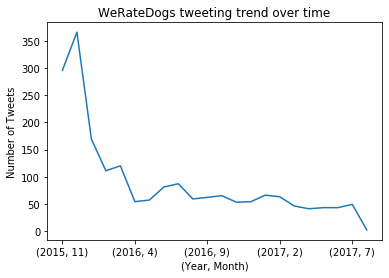

In [180]:
pltdata = df.tweet_id.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).count()
p = pltdata.plot(kind = 'line', title='WeRateDogs tweeting trend over time')
p.set_xlabel("(Year, Month)")
p.set_ylabel("Number of Tweets")
plt.savefig('trend_of_tweets')

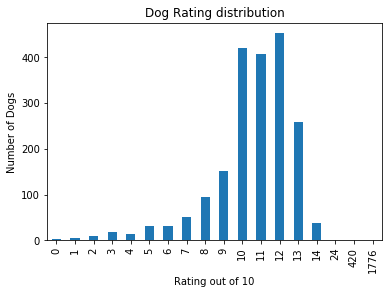

In [181]:
m = df.rating_numerator.value_counts().sort_index().plot(kind = 'bar', title = 'Dog Rating distribution')
m.set_xlabel("Rating out of 10")
m.set_ylabel("Number of Dogs")
plt.savefig('rating_distribution')

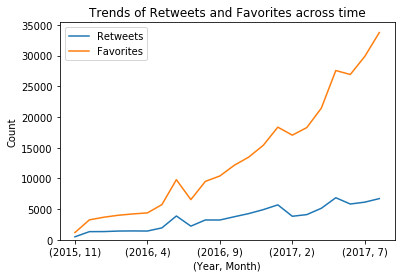

In [182]:
plt.subplots(1, sharex=True)
df.retweet_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot(kind = 'line')
df.favorite_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot(kind = 'line').set_ylim(0, )
plt.title('Trends of Retweets and Favorites across time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('retweets_favorites_trends')

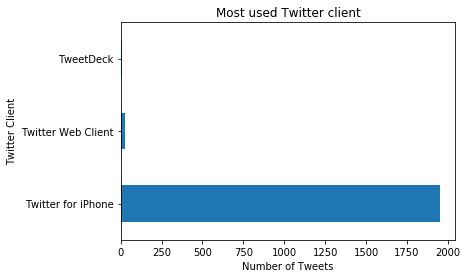

In [183]:
df['source'].value_counts().plot(kind = 'barh', title='Most used Twitter client')
plt.xlabel("Number of Tweets")
plt.ylabel("Twitter Client")
plt.savefig('twitter_source')

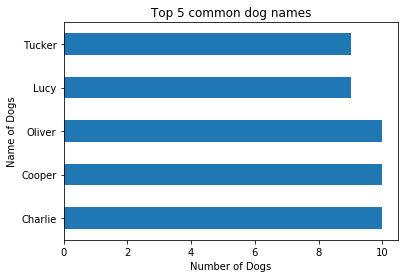

In [184]:
df.name.value_counts()[1:6].plot(kind = 'barh', title='Top 5 common dog names')
plt.xlabel("Number of Dogs")
plt.ylabel("Name of Dogs")
plt.savefig('dog_names')